In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def diffuse_radiation(len, mean=0.0, std=0.5):
  return np.random.normal(mean, std, size=len)
  #return np.random.randn(len)

In [ ]:
def spectralline(time, fs, amplitude=1.):
  return amplitude*np.cos(2.*np.pi*time/fs)

In [ ]:
def simFFT(signal, ts):
  FFTcomponents = np.fft.fftshift(np.fft.fft(np.fft.fftshift(signal)))
  N = len(signal)
  FFTfrequencies = np.fft.fftshift(np.fft.fftfreq(N, ts))
  return FFTcomponents, FFTfrequencies
  

In [ ]:
# bandwidth
bw=400  # MHz
print(f"Bandwidth bw={bw} MHz per polarisation")
# sample rate
fs = 800  # Msamp/s
print(f"Sample rate <requirement> fs={fs} Msamp/s")
# dump rate
ts = 1./fs  # s
print(f"ADC dump rate ts={ts} s")
# integration time
T = 5  # s
print(f"Integration/capture time T={T} s")
# number of time samples
N = int(T/ts)
print(f"Number samples captures N={N}")

Bandwidth bw=400 MHz per polarisation
Sample rate <requirement> fs=800 Msamp/s
ADC dump rate ts=0.00125 s
Integration/capture time T=5 s
Number samples captures N=4000


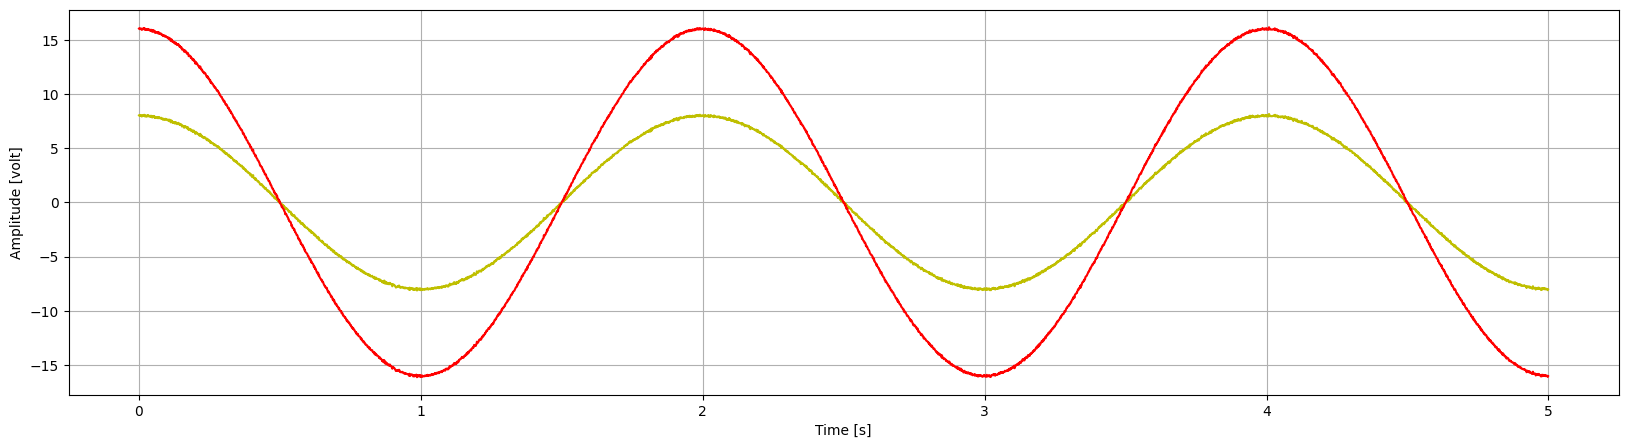

In [ ]:
noise = diffuse_radiation(N, mean=0.0, std=0.05)

time = np.array(range(0, N)) * ts
signal1 = spectralline(time, 2, amplitude=8.) + noise
signal2 = spectralline(time, 2, amplitude=16.) + noise

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(time, signal1, 'y', time, signal2, 'r')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude [volt]")
ax.grid(True)
plt.show()

In [ ]:
App = (np.max(signal1)-np.min(signal1))/2.
Arms = App/np.sqrt(2)
print(App, Arms)

fftsignal1, freqs = simFFT(signal1, ts)
Arms = 2.*np.abs(fftsignal1)/len(freqs)
App = np.sqrt(2)*Arms
print(np.max(App), np.max(Arms))

fftsignal2, freqs = simFFT(signal2, ts)
Arms = 2.*np.abs(fftsignal2)/len(freqs)
App = np.sqrt(2)*Arms
print(np.max(App), np.max(Arms))

8.138891223508569 5.755065175482585
7.857973083948818 5.556426054041577
15.715276700966145 11.112378723476116


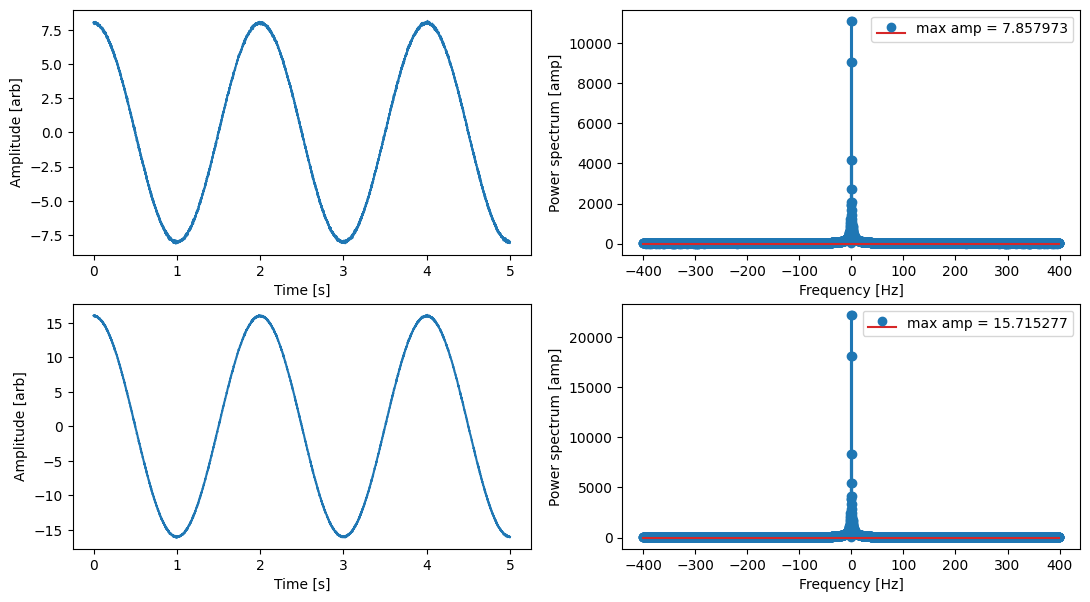

In [ ]:
fig, ax1 = plt.subplots(2,2,figsize=[13,7])
ax1[0,0].plot(time, signal1)
ax1[0,0].set_xlabel('Time [s]')
ax1[0,0].set_ylabel('Amplitude [arb]')
ax1[0,1].stem(freqs, np.abs(fftsignal1), label="max amp = %f"%np.max(np.sqrt(2)*2.*np.abs(fftsignal1)/len(freqs)))
ax1[0,1].set_xlabel('Frequency [Hz]')
ax1[0,1].set_ylabel('Power spectrum [amp]')
ax1[0,1].legend()
ax1[1,0].plot(time, signal2)
ax1[1,0].set_xlabel('Time [s]')
ax1[1,0].set_ylabel('Amplitude [arb]')
ax1[1,1].stem(freqs, abs(fftsignal2), label="max amp = %f"%np.max(np.sqrt(2)*2.*np.abs(fftsignal2)/len(freqs)))
ax1[1,1].set_xlabel('Frequency [Hz]')
ax1[1,1].set_ylabel('Power spectrum [amp]')
ax1[1,1].legend()
plt.show()

In [ ]:
#auto correlation
autocorr1 = fftsignal1*np.conj(fftsignal1)
Arms = 2.*np.abs(np.sqrt(autocorr1))/len(freqs)
App = np.sqrt(2)*Arms
print(np.max(App), np.max(Arms))

#auto correlation
autocorr2 = fftsignal2*np.conj(fftsignal2)
Arms = 2.*np.abs(np.sqrt(autocorr2))/len(freqs)
App = np.sqrt(2)*Arms
print(np.max(App), np.max(Arms))

#cross correlation
crosscorr = fftsignal1*np.conj(fftsignal2)
Arms = 2.*np.abs(np.sqrt(crosscorr))/len(freqs)
App = np.sqrt(2)*Arms
print(np.max(App), np.max(Arms))

7.857973083948818 5.556426054041577
15.715276700966145 11.112378723476116
11.112615413258931 7.857805715433537


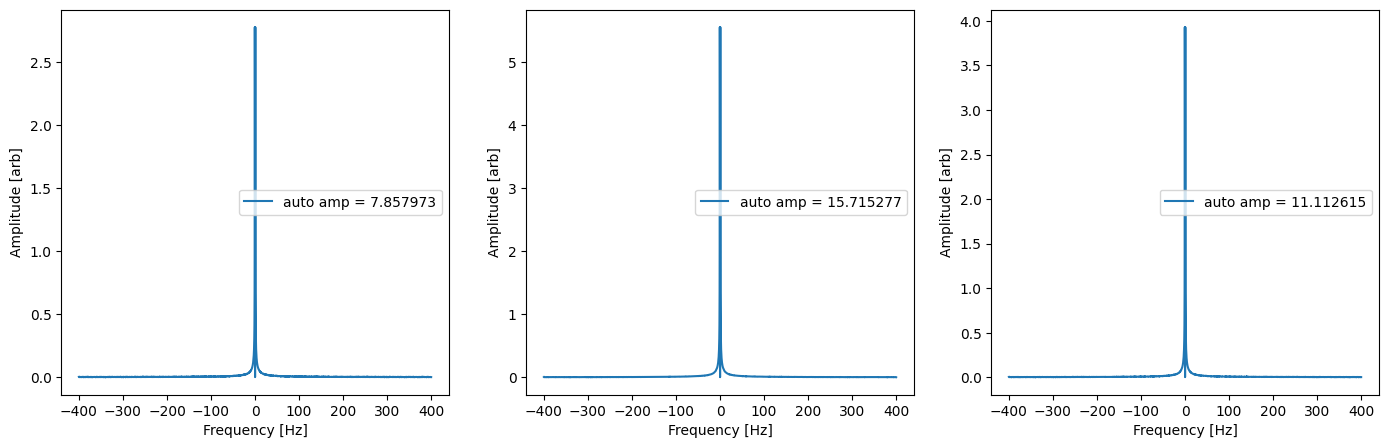

In [ ]:
fig, ax1 = plt.subplots(1,3,figsize=[17,5])
ax1[0].plot(freqs, np.abs(np.sqrt(autocorr1))/len(freqs), label="auto amp = %f"%np.max(np.sqrt(2)*2.*np.abs(np.sqrt(autocorr1))/len(freqs)))
ax1[0].set_xlabel('Frequency [Hz]')
ax1[0].set_ylabel('Amplitude [arb]')
ax1[0].legend()
ax1[1].plot(freqs, np.abs(np.sqrt(autocorr2))/len(freqs), label="auto amp = %f"%np.max(np.sqrt(2)*2.*np.abs(np.sqrt(autocorr2))/len(freqs)))
ax1[1].set_xlabel('Frequency [Hz]')
ax1[1].set_ylabel('Amplitude [arb]')
ax1[1].legend()
ax1[2].plot(freqs, np.abs(np.sqrt(crosscorr))/len(freqs), label="auto amp = %f"%np.max(np.sqrt(2)*2.*np.abs(np.sqrt(crosscorr))/len(freqs)))
ax1[2].set_xlabel('Frequency [Hz]')
ax1[2].set_ylabel('Amplitude [arb]')
ax1[2].legend()
plt.show()

In [ ]:
M=6
pwr = np.tile(np.array(crosscorr), (M,1)).sum(axis=0)
print(np.mean(np.abs(pwr/crosscorr)))

6.0


In [ ]:
A=16
B=8
print(np.sqrt(A*B))
print(np.sqrt(A/B)*B)
print(np.sqrt(B/A)*A)


11.313708498984761
11.313708498984761
11.313708498984761
